<a href="https://colab.research.google.com/github.com/hardayal/EVA/blob/master/Session_3/EVA_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**
Installation and importing of packages used by the network

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


Display the x_train[0] value using the matplotlib library

(60000, 28, 28)


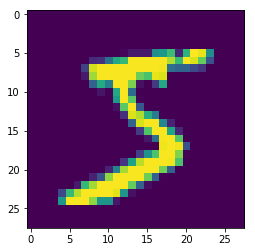

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

Reshaping the train and test data to a format with width ,height and channels.

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

Preprossing the train and test data to the 32-bit precision and dividing the it by 255 to normalize the date between 0.0 to 1.0 .

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Display the y training data

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)


The y train and test data are converted into one hot encoding by using the keras function.

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [10]:
from keras.layers import Activation
model = Sequential()


model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1),use_bias=False))
model.add(Convolution2D(10, 1, activation='relu', use_bias=False))
model.add(Convolution2D(10, 26, use_bias=False))
model.add(Flatten())
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1..., use_bias=False)`
  """


Using BatchNormalization

In [11]:
from keras.layers import Activation, BatchNormalization
model2 = Sequential()


model2.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1),use_bias=False))

model2.add(BatchNormalization())

model2.add(Convolution2D(40, 3, 3 , activation='relu', use_bias=False))

model2.add(BatchNormalization())

model2.add(Dropout(0.25))

model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Convolution2D(10,1, activation='relu',use_bias=False))

model2.add(BatchNormalization())

model2.add(Convolution2D(40, 3, 3 , activation='relu', use_bias=False))

model2.add(BatchNormalization())

model2.add(Dropout(0.25))

model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Convolution2D(10, 1, 1 , activation='relu', use_bias=False))

model2.add(Convolution2D(10, 5, 5, use_bias=False))
model2.add(Flatten())
model2.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1..., use_bias=False)`
  """


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(40, (3, 3), activation="relu", use_bias=False)`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(40, (3, 3), activation="relu", use_bias=False)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu", use_bias=False)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (5, 5), use_bias=False)`


In [12]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        288       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 40)        11520     
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 40)        160       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 40)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 40)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 12, 10)        400       
__________

In [0]:
class Callback(keras.callbacks.Callback):
    def __init__(self, test_data):
        self.test_data = test_data

    def on_epoch_end(self, epoch, logs={}):
        x, y = self.test_data
        loss, acc = self.model.evaluate(x, y, verbose=0)
        print('\nValidation loss: {}, acc: {}\n'.format(loss, acc))

In [0]:
model2.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])


Traing the model using the input data X_train , Y_train with the batch size 64 and epoch 10 and verbose 1. where batch size is the number images it has to considered for the each training. epochs is the number of times the modal has to run.

In [15]:
model2.fit(X_train, Y_train, batch_size=64, nb_epoch=30, verbose=1,callbacks=[Callback((X_test, Y_test))])

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/30
60000/60000 [==============================] - 11s 185us/step - loss: 0.1931 - acc: 0.9390

Validation loss: 0.08011230353564024, acc: 0.9737

Epoch 2/30
60000/60000 [==============================] - 8s 126us/step - loss: 0.0623 - acc: 0.9813

Validation loss: 0.05054058146774769, acc: 0.9839

Epoch 3/30
60000/60000 [==============================] - 8s 140us/step - loss: 0.0483 - acc: 0.9852

Validation loss: 0.05715034210719168, acc: 0.9826

Epoch 4/30
60000/60000 [==============================] - 8s 126us/step - loss: 0.0422 - acc: 0.9866

Validation loss: 0.04000820957710966, acc: 0.9883

Epoch 5/30
60000/60000 [==============================] - 8s 126us/step - loss: 0.0359 - acc: 0.9889

Validation loss: 0.034038484313199294, acc: 0.9888

Epoch 6/30
60000/60000 [==============================] - 8s 126us/step - loss: 0.0334 - acc: 0.9893

Validation loss: 0.036301521768746896, acc: 0.9885

Epoch 7/30
60000/60000 [==============================] - 8s 126us/step - loss:

In [18]:
model2.fit(X_train, Y_train, batch_size=64, nb_epoch=30, verbose=1,callbacks=[Callback((X_test, Y_test))])

Epoch 1/30
 1216/60000 [..............................] - ETA: 9s - loss: 0.0122 - acc: 0.9959

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 8s 127us/step - loss: 0.0122 - acc: 0.9958

Validation loss: 0.02630471598062286, acc: 0.9925

Epoch 2/30
60000/60000 [==============================] - 8s 125us/step - loss: 0.0123 - acc: 0.9959

Validation loss: 0.036983328984782564, acc: 0.9894

Epoch 3/30
60000/60000 [==============================] - 8s 126us/step - loss: 0.0104 - acc: 0.9964

Validation loss: 0.03224543913633533, acc: 0.9898

Epoch 4/30
60000/60000 [==============================] - 8s 125us/step - loss: 0.0115 - acc: 0.9960

Validation loss: 0.0306096687755693, acc: 0.991

Epoch 5/30
60000/60000 [==============================] - 8s 127us/step - loss: 0.0109 - acc: 0.9959

Validation loss: 0.03399906416933664, acc: 0.9894

Epoch 6/30
60000/60000 [==============================] - 8s 139us/step - loss: 0.0098 - acc: 0.9967

Validation loss: 0.03226683392278792, acc: 0.9916

Epoch 7/30
60000/60000 [==============================] - 8s 125us/step - loss: 0.0116 - acc: 

Evaluate is used to calculate the loss and the accuracy of the input data.

In [0]:
score = model2.evaluate(X_test, Y_test, verbose=0)

In [20]:
print(score)

[0.03281396808579966, 0.9926]


In [21]:
model3 = Sequential()


model3.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1),use_bias=False))

model3.add(BatchNormalization())

model3.add(Convolution2D(32, 3, 3 , activation='relu', use_bias=False))

model3.add(BatchNormalization())

model3.add(Dropout(0.25))

model3.add(MaxPooling2D(pool_size=(2,2)))

model3.add(Convolution2D(16,1, activation='relu',use_bias=False))

model3.add(BatchNormalization())

model3.add(Convolution2D(30, 3, 3 , activation='relu', use_bias=False))

model3.add(BatchNormalization())

model3.add(Dropout(0.25))

model3.add(MaxPooling2D(pool_size=(2,2)))

model3.add(Convolution2D(10, 1, 1 , activation='relu', use_bias=False))

model3.add(BatchNormalization())

model3.add(Convolution2D(10, 5, 5, use_bias=False))

model3.add(Flatten())
model3.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1..., use_bias=False)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", use_bias=False)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(30, (3, 3), activation="relu", use_bias=False)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu", use_bias=False)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (5, 5), use_bias=False)`


In [22]:
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 16)        144       
_________________________________________________________________
batch_normalization_5 (Batch (None, 26, 26, 16)        64        
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 32)        4608      
_________________________________________________________________
batch_normalization_6 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
dropout_3 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 12, 12, 16)        512       
__________

In [0]:
model3.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [24]:
model3.fit(X_train, Y_train, batch_size=128, nb_epoch=50, verbose=1,callbacks=[Callback((X_test, Y_test))])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/50
60000/60000 [==============================] - 6s 100us/step - loss: 0.2917 - acc: 0.9176

Validation loss: 0.08725186939015984, acc: 0.9754

Epoch 2/50
60000/60000 [==============================] - 5s 76us/step - loss: 0.0718 - acc: 0.9787

Validation loss: 0.05846041624508798, acc: 0.9838

Epoch 3/50
60000/60000 [==============================] - 5s 76us/step - loss: 0.0524 - acc: 0.9840

Validation loss: 0.044278167476691305, acc: 0.9878

Epoch 4/50
60000/60000 [==============================] - 5s 76us/step - loss: 0.0426 - acc: 0.9871

Validation loss: 0.04647565716933459, acc: 0.9868

Epoch 5/50
60000/60000 [==============================] - 5s 76us/step - loss: 0.0372 - acc: 0.9884

Validation loss: 0.04447198177538812, acc: 0.9868

Epoch 6/50
60000/60000 [==============================] - 5s 76us/step - loss: 0.0335 - acc: 0.9897

Validation loss: 0.04301545846918598, acc: 0.987

Epoch 7/50
60000/60000 [==============================] - 5s 76us/step - loss: 0.0296 -

In [25]:
score = model3.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.03705840708265132, 0.989]


###Different approach:

In [57]:
import warnings
num_classes = 10
(x_train, y_train), (x_test, y_test) = mnist.load_data()
img_height, img_width = x_train.shape[1],x_train.shape[2]


y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

from keras.preprocessing.image import ImageDataGenerator


x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train/= 255
x_test/= 255

from keras.layers import BatchNormalization
from keras.layers import Conv2D, SeparableConv2D
from keras.callbacks import Callback, ModelCheckpoint


model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(SeparableConv2D(32, 3, 3))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(SeparableConv2D(64, 3, 3))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Conv2D(32, 1, 1))
model.add(SeparableConv2D(128, 3, 3))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(10, 1))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Convolution2D(10, 4))
model.add(Flatten())


model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()


class EarlyStoppingByAccuracy(Callback):
    def __init__(self, monitor='val_acc', mode='max', value=0.98, verbose=0):
        super(Callback, self).__init__()
        self.monitor = monitor
        self.value = value
        self.verbose = verbose

    def on_epoch_end(self, epoch, logs={}):
        current = logs.get(self.monitor)
        if current is None:
            warnings.warn("Early stopping requires %s available!" % self.monitor, RuntimeWarning)
        
        if current >= self.value:
            if self.verbose > 0:
                print("Epoch %05d: early stopping THR" % epoch)
            self.model.stop_training = True

callbacks = [
    EarlyStoppingByAccuracy(monitor='val_acc', value=0.994, verbose=1),
    ModelCheckpoint(filepath='/tmp/weights.hdf5', monitor='val_loss', save_best_only=True, verbose=0),
]          



image_gen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.5,
        zoom_range=(0.9, 1.1),
        horizontal_flip=False,
        vertical_flip=False,
        fill_mode='constant',
        cval=0)

#training the image preprocessing
image_gen.fit(x_train, augment=True)
                
model.fit_generator(image_gen.flow(x_train, y_train, batch_size=64),
          epochs=30,
          steps_per_epoch=len(x_train)/(64),
          verbose=1,
          validation_data=(x_test, y_test),
          callbacks=callbacks)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(32, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(64, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (1, 1))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(128, (3, 3))`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_15 (Batc (None, 26, 26, 32)        128       
_________________________________________________________________
activation_10 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
separable_conv2d_4 (Separabl (None, 24, 24, 32)        1344      
_________________________________________________________________
batch_normalization_16 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
activation_11 (Activation)   (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 32)        0         
__________

In [58]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.019515352329933375, 0.994]


Predict is used to generate the accuracy of the input data.

In [0]:
y_pred = model3.predict(X_test)

In [68]:
print(y_pred[:9])
print(y_test[:9])

[[2.0240398e-11 1.4089855e-09 4.9526525e-09 2.8171017e-09 1.3878695e-12
  4.6697396e-15 2.7794509e-18 1.0000000e+00 3.2216476e-12 2.3058577e-08]
 [3.5276519e-06 1.8498626e-04 9.9980849e-01 1.0914896e-10 4.8222248e-08
  2.4239770e-11 1.4348688e-06 3.7136876e-09 1.5162911e-06 4.5145346e-12]
 [7.9495460e-10 9.9999976e-01 4.2157194e-10 1.4902638e-13 1.5949685e-07
  2.0009024e-10 9.7327635e-10 1.0995280e-07 1.1446364e-09 6.8807397e-11]
 [9.9999964e-01 2.0721643e-11 2.4425251e-10 4.6587354e-14 1.7495862e-11
  2.1064990e-11 4.1320337e-07 2.5794601e-11 9.3256602e-09 3.4626086e-09]
 [1.1124602e-11 6.8545191e-08 1.2462986e-10 2.6262722e-15 9.9972612e-01
  3.2281805e-13 2.2371964e-09 1.8117989e-09 5.8911818e-09 2.7372217e-04]
 [2.7230701e-10 9.9999893e-01 5.7216898e-10 2.4005398e-14 7.4347406e-07
  1.7206903e-11 7.6797325e-11 3.5151800e-07 5.8261551e-10 3.8924355e-10]
 [6.2325714e-14 3.8437315e-07 9.7784012e-12 3.1909679e-15 9.9998879e-01
  6.7023394e-11 3.6203831e-14 2.1743372e-08 2.7294269e-07 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_10'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()